# Notebook TP3 Optimisation  
# DAI Yucheng - ADJAL Massyl

## Import des librairies :

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import scipy.optimize
import TP3_main as main
importlib.reload(main)
from TP3_main import J, ImprimeIsovaleur, GradJ, d2J, PrintSolutions, NewSelution, CalMatrix_DeterNature, FindMinima, VerifyPtMin, Gradient_PasFixe

## Première partie :
### 1.1 : Tracer les isovaleurs de la fonction J

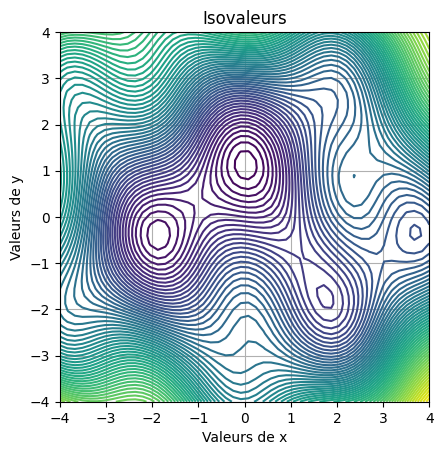

In [12]:
# Définition du domaine de tracé
xmin, xmax, nx = -4, 4, 50 # max value, min value, sample size of X
ymin, ymax, ny = -4, 4, 50 # max value, min value, sample size of Y

x1d = np.linspace(xmin,xmax,nx) # Generate nx equally spaced x-values in the range [xmin, xmax].
y1d = np.linspace(ymin,ymax,ny) # Generate ny equally spaced y-values in the range [ymin, ymax].
x2d, y2d = np.meshgrid(x1d, y1d) ## Generate a 2D grid by meshing网格化 x and y values so that the function value can be calculated at each grid point

# Tracé des isovaleurs de f1
main.ImprimeIsovaleur(main.J,x2d,y2d)



### 1.2 :

In [13]:
# Q1.2 déterminer les points critiques de 𝐽, déterminer leur nature

solutions = []                                             # afin de sauvgarder les racine de grad = 0
for x1 in x1d:
    for x2 in y1d:
        sol = main.root(main.GradJ, [x1, x2])
        if sol.success and main.NewSelution(sol.x, solutions): # si root a bien trouvé la racine et c'est pas une raciné existé
            solutions.append(sol.x.tolist()) # alors on le sauvgarde

main.PrintSolutions(solutions)
main.CalMatrix_DeterNature(solutions)
minima = main.FindMinima(main.J,x1d,y1d)
print("Les points minimals par rapport au fct scipy.optimize.minimize:\n",minima,'\n')

solutions = np.array(solutions)
print( "Toutes les solutions:\n",solutions)



racines trouvées：
[-1.8707866131429896, -0.39254327179565207]
[-1.000094474670791, 0.3103021569655692]
[0.024429140235495236, 1.129908430106512]
[3.6994150600381177, -0.3349668900857044]
[1.7571265369501623, -1.749537156922367]
[1.2342058013892714, -0.8789116060185264]
[2.637174736478029, 1.1918062123063133]
[2.408369785012011, 0.8607659433320444]
[2.98550383554998, -0.8792032495782736]

Valeurs propres de la matrice : 
 [17.02749761  0.04584859] 
 [ 0.04584859 10.49082451]
  vp1 = 17.02781918183127
  vp2 = 10.490502943120207
point : [-1.8707866131429896, -0.39254327179565207] is Val min

Valeurs propres de la matrice : 
 [ -5.08356956 -10.78893838] 
 [-10.78893838   4.85268441]
  vp1 = -11.99329915879138
  vp2 = 11.762414016312164
point : [-1.000094474670791, 0.3103021569655692] point selle

Valeurs propres de la matrice : 
 [17.558023    1.07641634] 
 [ 1.07641634 10.24080333]
  vp1 = 17.713085678189657
  vp2 = 10.085740644940536
point : [0.024429140235495236, 1.129908430106512] is V

### 1.3 Use the function "minimize" in the library scipy.optimize  in order to determinate the minimum points of J

In [14]:
main.VerifyPtMin(solutions,minima)

We have already found the point [-1.8707866131429896,-0.39254327179565207] in the solutions found by scipy.optimize.minimize
We have already found the point [0.024429140235495236,1.129908430106512] in the solutions found by scipy.optimize.minimize
We have already found the point [3.6994150600381177,-0.3349668900857044] in the solutions found by scipy.optimize.minimize
We have already found the point [1.7571265369501623,-1.749537156922367] in the solutions found by scipy.optimize.minimize


## Deuxième partie :
### 2.1 :  Gradient à pas fixe

La recherche du minimum à convergé :  True
Le nombre d'itérations :  12
Le dernier point obtenu :  [-1.87058494 -0.40227924]


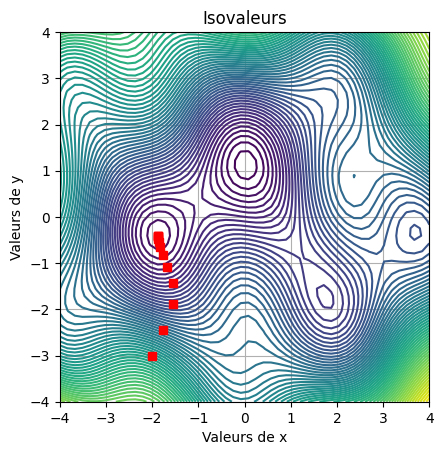

In [15]:
X0 = [-2,-3]
alpha = 0.04
epsilon = 0.01
Nmax = 1000 

Xn_vector, Converged = Gradient_PasFixe(J,GradJ,X0,alpha,epsilon,Nmax)

print("La recherche du minimum à convergé : ", Converged)
print("Le nombre d'itérations : ", len(Xn_vector)-1)
print("Le dernier point obtenu : ", Xn_vector[-1])

plt.figure()
ImprimeIsovaleur(J,x2d,y2d)
plt.plot(Xn_vector[:,0],Xn_vector[:,1],'rs', label = 'Xn')
plt.show()

## Troisième Partie
### 3.1 Tracer l'isovaleur de J et la droite

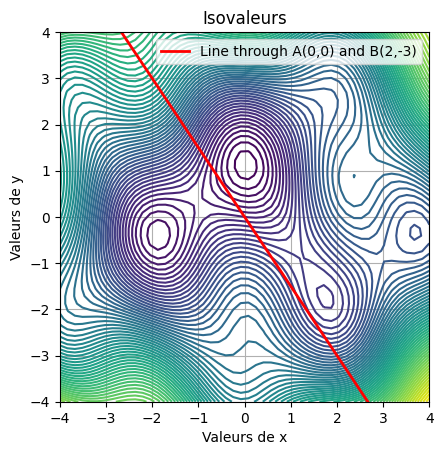

In [16]:
a = [0,0]; b = [2,-3]
y = main.StraightEq(a,b,x1d)

main.ImprimeIsovaleur(main.J,x2d,y2d)
main.DrawStraignt(x1d,y)

D'après les résultats obtenus dans la section 1.2, il y a 2 points minimum le long de la droite passant par (0, 0) et (2, -3) :

\begin{bmatrix}
(0.024429140235495236, 1.129908430106512) \\
(1.7571265369501623, -1.749537156922367)
\end{bmatrix}


Ainsi, nous pouvons estimer visuellement que les points extrêmes sont approximativement :

\begin{bmatrix}
(-0.5, 0.75) \\
(1.5, -2.25)
\end{bmatrix}


### 3.2 Apply the Lagrange multiplier method to solve the problem

Par rapport à la partie 1, on a :
$J(x_{1},x_{2}) = x_{1}^2 + 1,5.x_{2}^2 - 3.sin(2x_{1} + x_{2}) + 5.sin(x_{1} - x_{2})$

et son gradiant est bien : 

$\nabla J(x_{1},x_{2}) = \left(\begin{array}{cc} 
2x_{1} - 6cos(2x_{1} + x_{2}) + 5cos(x_{1} - x_{2})\\
3x_{2} - 3cos(2x_{1} + x_{2}) - 5cos(x_{1} - x_{2})
\end{array}\right)$

Et par rapport les deux points le droite traverse on peut obtenir aussi l'équation du droite et son gradiant:

$l(x_{1},x_{2}) = x_{2} + \frac{3}{2}x_{1}$

$\nabla l(x_{1},x_{2}) = \left(\begin{array}{cc} 
\frac{3}{2}\\
{1}
\end{array}\right)$

On peut donc créer 3 équations afin de construir les équations de Lagrange:

$\left\{
\begin{array}{l}
\frac{\partial J}{\partial x} - \lambda \frac{\partial l}{\partial x} = 0 \\
\frac{\partial J}{\partial y} - \lambda \frac{\partial l}{\partial y} = 0 \\
l(x_{1},x_{2}) = x_{2} + \frac{3}{2}x_{1} = 0
\end{array}
\right.$



In [17]:
initial_guesses = [(-0.5,0.75,0),(1.5,-2.25,0)]
RootLgrgSys = main.RootLagEq(initial_guesses)
for idx, solution in enumerate(RootLgrgSys):
    print(f"Solution {idx+1}: x1 = {solution[0]}, x2 = {solution[1]}")

Solution 1: x1 = -0.44972848483327943, x2 = 0.6745927272499193
Solution 2: x1 = 1.428403791395588, x2 = -2.1426056870933823


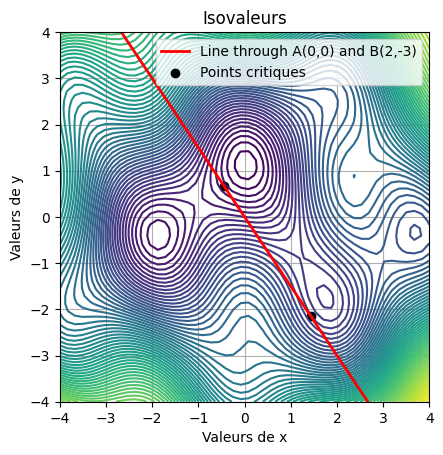

In [18]:
main.ImprimeIsovaleur(main.J,x2d,y2d)
main.DrawStraignt(x1d,y)
critical_points = np.array(RootLgrgSys)
plt.scatter(critical_points[:,0], critical_points[:,1], color='black', label='Points critiques')

# Les solutions trouvées
plt.legend()
plt.grid(True)

### 3.2 Résoudre à nouveau le problème, mais pour la droite ∆′ passant par les points $A(0,1)$ et $B(2, -2)$


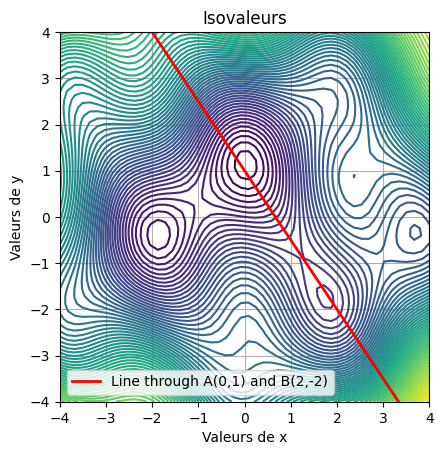

In [22]:
a = [0,1]; b = [2,-2]
y = main.StraightEq(a,b,x1d)

main.ImprimeIsovaleur(main.J,x2d,y2d)
plt.plot(x1d, y, 'r-', label='Line through A(0,1) and B(2,-2)', linewidth=2)  # red straight
plt.legend() 

En raison de ces deux droites ont le même pente $k = -\frac{3}{2}$, donc on n'a que besoin de modifier la $3^{ème
}$
 équation, et aussi choisir 2 point différents. 

Ici, je choisis $(0,1)$ et $(1.75, -2.625)$

In [33]:
def LagrangeEqs2(variables):  # ici, on remplace x1 et x2 dans J par x et y, donc c'est x^2 + 1.5y^2 - 3sin(2x+y) + 5sin(x-y)
    x, y, lambd = variables
    eq1 = 2 * x - 6 * np.cos(2 * x + y) + 5 * np.cos(x - y) - 3 / 2 * lambd  # ∂x/∂J - λ*(∂x/∂Δ')
    eq2 = 3 * y - 3 * np.cos(2 * x + y) - 5 * np.cos(x - y) - lambd  # ∂y/∂J - λ*(∂y/∂Δ')
    eq3 = 3 / 2 * x + y - 1  # l'équation du droite : Δ'
    return [eq1, eq2, eq3]


initial_guesses = [(0,1,0),(1.75,-2.625,0)]

solutions2 = []
for i in initial_guesses:
    solution = scipy.optimize.root(LagrangeEqs2, i)
    if solution.success:
        solutions2.append(solution.x)

for idx, solution in enumerate(solutions2):
    print(f"Solution {idx+1}: x1 = {solution[0]}, x2 = {solution[1]}")

Solution 1: x1 = -0.039581297872668654, x2 = 1.059371946809003
Solution 2: x1 = 1.7985652040476834, x2 = -1.697847806071525


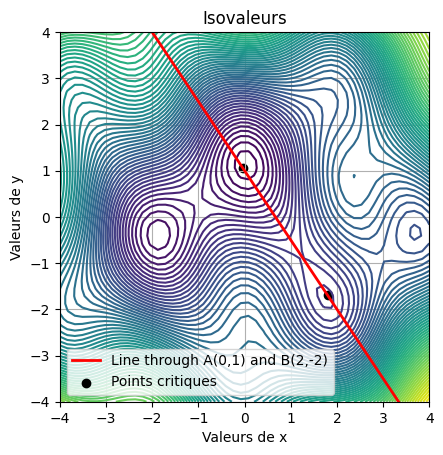

In [34]:
main.ImprimeIsovaleur(main.J,x2d,y2d)
plt.plot(x1d, y, 'r-', label='Line through A(0,1) and B(2,-2)', linewidth=2)  # red straight
plt.legend() 
critical_points = np.array(solutions2)
plt.scatter(critical_points[:,0], critical_points[:,1], color='black', label='Points critiques')

# Les solutions trouvées
plt.legend()
plt.grid(True)